# EDA of Beta to ETH - no rolling (2021)

In [1]:
import pandas as pd
import seaborn as sns

from utils.alpha_utils import create_alpha
from utils.jupyter_utils import (
    show_kde,
    show_alpha_vs_beta,
    show_timeseries_plot,
    show_pct_distribution,
    show_beta_distribution_box_plot,
)

In [2]:
# Fetch data from 01.01.2021 to 01.01.2022 (1 full year)
alpha_2021 = create_alpha(period_start=2021, period_end=2022, use_rolling=False)

15-08-2024 15:22:34 - ARB11841-USD: Data doesn't exist for startDate = 1609459200, endDate = 1640995200
15-08-2024 15:22:34 - SEI-USD: Data doesn't exist for startDate = 1609459200, endDate = 1640995200
15-08-2024 15:22:34 - SUI20947-USD: Data doesn't exist for startDate = 1609459200, endDate = 1640995200
15-08-2024 15:22:34 - OP-USD: Data doesn't exist for startDate = 1609459200, endDate = 1640995200
15-08-2024 15:22:34 - APT21794-USD: Data doesn't exist for startDate = 1609459200, endDate = 1640995200
15-08-2024 15:22:37 - JTO-USD: Data doesn't exist for startDate = 1609459200, endDate = 1640995200
15-08-2024 15:22:37 - COW19269-USD: Data doesn't exist for startDate = 1609459200, endDate = 1640995200
15-08-2024 15:22:39 - AXL17799-USD: Data doesn't exist for startDate = 1609459200, endDate = 1640995200
15-08-2024 15:22:42 - KAS-USD: Data doesn't exist for startDate = 1609459200, endDate = 1640995200
15-08-2024 15:22:45 - WBT-USD: Data doesn't exist for startDate = 1609459200, endDate

In [3]:
df_2021 = alpha_2021.get_df()

In [4]:
df_2021

,Beta,Alpha
BTC-USD,0.583366,-1.187088e-03
ETH-USD,1.000000,-4.798504e-18
LTC-USD,0.907945,-3.538979e-03
XMR-USD,0.733660,-1.806524e-03
XRP-USD,0.787640,-3.737889e-04
...,...,...
HOT-USD,0.729984,-1.972701e-03
SHIB-USD,0.817475,6.502287e-03
FLOKI-USD,1.748242,1.322612e-02
BTT-USD,0.902007,2.341325e-03


In [5]:
high_beta = df_2021[df_2021['Beta'] > 1]
high_beta_pct = (len(high_beta) / len(df_2021)) * 100

low_beta = df_2021[df_2021['Beta'] < 1]
low_beta_pct = (len(low_beta) / len(df_2021)) * 100

high_beta_positive_alpha = df_2021[(df_2021['Beta'] > 1) & (df_2021['Alpha'] > 0)]
high_beta_positive_alpha_pct = (len(high_beta_positive_alpha) / len(df_2021)) * 100

high_beta_negative_alpha = df_2021[(df_2021['Beta'] > 1) & (df_2021['Alpha'] < 0)]
high_beta_negative_alpha_pct = (len(high_beta_negative_alpha) / len(df_2021)) * 100

In [6]:
print(f"There are {len(high_beta)} (about {high_beta_pct:.1f}%) tokens which betas are above 1")
high_beta.sort_values(by='Beta', ascending=False)

There are 23 (about 20.0%) tokens which betas are above 1


,Beta,Alpha
FLOKI-USD,1.748242,1.322612e-02
IMX10603-USD,1.540003,9.497826e-03
GEL-USD,1.270650,2.538486e-03
RBN-USD,1.269693,-1.081710e-02
GMX11857-USD,1.267759,-2.035799e-04
LDO-USD,1.243014,-2.796314e-03
SWISE-USD,1.172505,-5.760661e-03
MINA-USD,1.150402,-1.568334e-04
RUNE-USD,1.147446,-7.252887e-04
SFP-USD,1.147049,6.103838e-04


In [7]:
print(f"There are {len(low_beta)} (about {low_beta_pct:.1f}%) tokens which betas are below 1")
low_beta.sort_values(by='Beta', ascending=False)

There are 92 (about 80.0%) tokens which betas are below 1


,Beta,Alpha
ENJ-USD,0.994564,0.003416
CAKE-USD,0.983666,0.003174
SNX-USD,0.982940,-0.005720
KAVA-USD,0.980119,-0.001493
CRV-USD,0.978578,0.001361
...,...,...
BDX-USD,0.311401,-0.000600
BGB-USD,0.253744,0.000792
LEO-USD,0.041157,0.002611
FRAX-USD,0.020775,-0.000126


In [8]:
print(f"There are {len(high_beta_positive_alpha)} (about {high_beta_positive_alpha_pct:.1f}%) tokens which betas are above 1 and which alphas are positive")
high_beta_positive_alpha.sort_values(by='Beta', ascending=False)

There are 9 (about 7.8%) tokens which betas are above 1 and which alphas are positive


,Beta,Alpha
FLOKI-USD,1.748242,0.013226
IMX10603-USD,1.540003,0.009498
GEL-USD,1.270650,0.002538
SFP-USD,1.147049,0.000610
FTM-USD,1.126107,0.008061
ENS-USD,1.117002,0.013470
ILV-USD,1.050876,0.010285
MATIC-USD,1.040108,0.008981
RPL-USD,1.025967,0.003404


In [9]:
print(f"There are {len(high_beta_negative_alpha)} (about {high_beta_negative_alpha_pct:.1f}%) tokens which betas are above 1 and which alphas are negative")
high_beta_negative_alpha.sort_values(by='Beta', ascending=False)

There are 14 (about 12.2%) tokens which betas are above 1 and which alphas are negative


,Beta,Alpha
RBN-USD,1.269693,-1.081710e-02
GMX11857-USD,1.267759,-2.035799e-04
LDO-USD,1.243014,-2.796314e-03
SWISE-USD,1.172505,-5.760661e-03
MINA-USD,1.150402,-1.568334e-04
RUNE-USD,1.147446,-7.252887e-04
PENDLE-USD,1.126880,-6.004112e-03
ICP-USD,1.076312,-1.252200e-02
VET-USD,1.062914,-7.338723e-04
LINK-USD,1.062280,-3.427948e-03


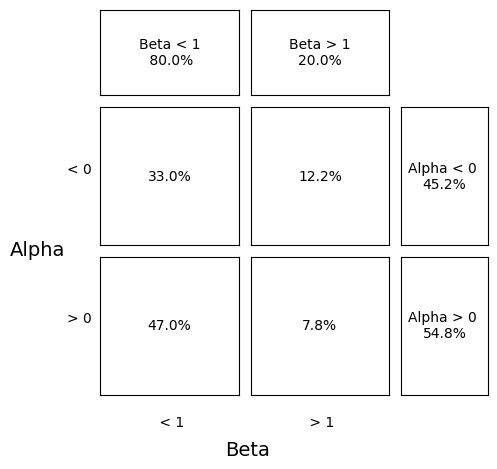

In [10]:
plt = show_pct_distribution(df_2021)
plt.show()

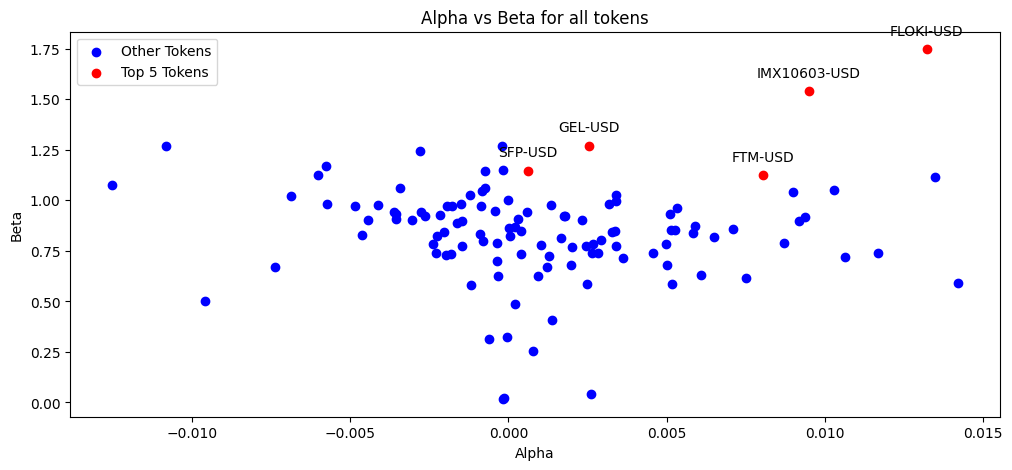

In [11]:
plt = show_alpha_vs_beta(high_beta_positive_alpha, df_2021)
plt.show()

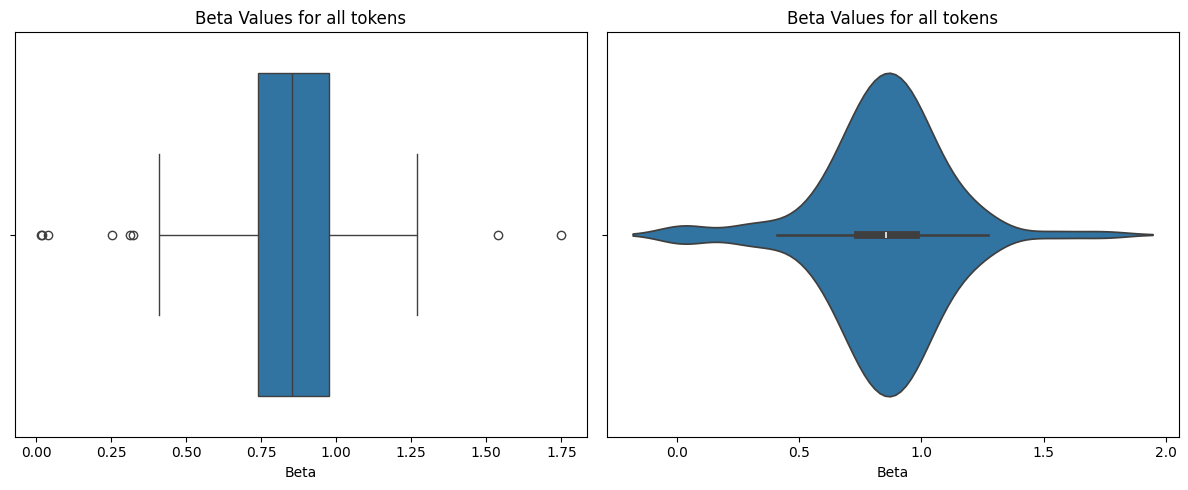

In [12]:
plt = show_beta_distribution_box_plot(df_2021)
plt.show()

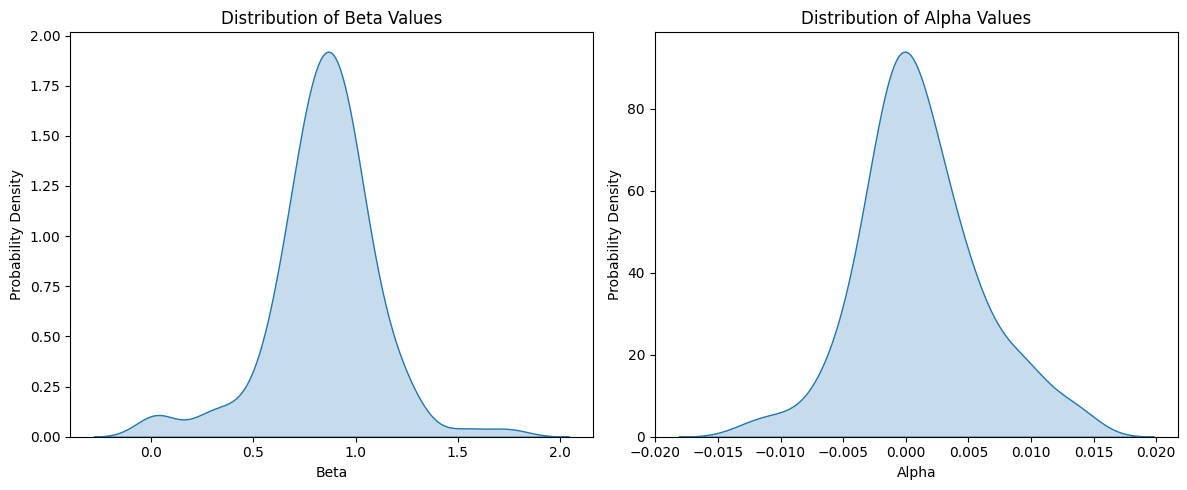

In [13]:
plt = show_kde(df_2021)
plt.show()

# EDA of Beta to ETH - no rolling (2022)

In [14]:
# Fetch data from 01.01.2022 to 01.01.2023 (1 full year)
alpha_2022 = create_alpha(period_start=2022, period_end=2023, use_rolling=False)

15-08-2024 15:23:20 - SEI-USD: Data doesn't exist for startDate = 1640995200, endDate = 1672531200
15-08-2024 15:23:20 - SUI20947-USD: Data doesn't exist for startDate = 1640995200, endDate = 1672531200
15-08-2024 15:23:20 - ARB11841-USD: Data doesn't exist for startDate = 1640995200, endDate = 1672531200
15-08-2024 15:23:23 - JTO-USD: Data doesn't exist for startDate = 1640995200, endDate = 1672531200
15-08-2024 15:23:27 - WIF-USD: Data doesn't exist for startDate = 1640995200, endDate = 1672531200
15-08-2024 15:23:27 - ONDO-USD: Data doesn't exist for startDate = 1640995200, endDate = 1672531200
15-08-2024 15:23:28 - PYTH-USD: Data doesn't exist for startDate = 1640995200, endDate = 1672531200
15-08-2024 15:23:28 - BRETT29743-USD: Data doesn't exist for startDate = 1640995200, endDate = 1672531200
15-08-2024 15:23:28 - JUP29210-USD: Data doesn't exist for startDate = 1640995200, endDate = 1672531200
15-08-2024 15:23:30 - FLR-USD: Data doesn't exist for startDate = 1640995200, endDate

In [15]:
df_2022 = alpha_2022.get_df()

In [16]:
df_2022

,Beta,Alpha
BTC-USD,0.661923,-8.673143e-04
ETH-USD,1.000000,-4.507513e-19
LTC-USD,0.816937,4.419687e-04
XMR-USD,0.722939,6.682192e-04
XRP-USD,0.743676,-1.726988e-04
...,...,...
HOT-USD,0.514886,-4.395923e-03
SHIB-USD,0.809756,-1.453672e-03
FLOKI-USD,1.074900,-4.020552e-03
BTT-USD,0.205333,-2.101121e-02


In [17]:
high_beta = df_2022[df_2022['Beta'] > 1]
high_beta_pct = (len(high_beta) / len(df_2022)) * 100

low_beta = df_2022[df_2022['Beta'] < 1]
low_beta_pct = (len(low_beta) / len(df_2022)) * 100

high_beta_positive_alpha = df_2022[(df_2022['Beta'] > 1) & (df_2022['Alpha'] > 0)]
high_beta_positive_alpha_pct = (len(high_beta_positive_alpha) / len(df_2022)) * 100

high_beta_negative_alpha = df_2022[(df_2022['Beta'] > 1) & (df_2022['Alpha'] < 0)]
high_beta_negative_alpha_pct = (len(high_beta_negative_alpha) / len(df_2022)) * 100

In [18]:
print(f"There are {len(high_beta)} (about {high_beta_pct:.1f}%) tokens which betas are above 1")
high_beta.sort_values(by='Beta', ascending=False)

There are 34 (about 27.0%) tokens which betas are above 1


,Beta,Alpha
LUNC-USD,1.576644,-0.031757
LDO-USD,1.297140,0.000274
APT21794-USD,1.290718,-0.008208
RUNE-USD,1.273657,-0.000853
SWISE-USD,1.266974,0.001592
CRV-USD,1.224909,-0.003054
GMX11857-USD,1.214818,0.006380
RNDR-USD,1.195716,-0.003195
SNX-USD,1.163001,-0.000166
GMT18069-USD,1.157508,0.006553


In [19]:
print(f"There are {len(low_beta)} (about {low_beta_pct:.1f}%) tokens which betas are below 1")
low_beta.sort_values(by='Beta', ascending=False)

There are 92 (about 73.0%) tokens which betas are below 1


,Beta,Alpha
ETH-USD,1.000000,-4.507513e-19
DYDX-USD,0.999138,-2.410128e-03
FLOW-USD,0.998191,-4.106932e-03
RETH-USD,0.995409,1.535498e-04
LPT-USD,0.991943,-2.978822e-03
...,...,...
LEO-USD,0.207844,4.828139e-04
BTT-USD,0.205333,-2.101121e-02
FRAX-USD,0.021091,7.314419e-05
WLD-USD,0.018509,7.564849e-05


In [20]:
print(f"There are {len(high_beta_positive_alpha)} (about {high_beta_positive_alpha_pct:.1f}%) tokens which betas are above 1 and which alphas are positive")
high_beta_positive_alpha.sort_values(by='Beta', ascending=False)

There are 7 (about 5.6%) tokens which betas are above 1 and which alphas are positive


,Beta,Alpha
LDO-USD,1.297140,0.000274
SWISE-USD,1.266974,0.001592
GMX11857-USD,1.214818,0.006380
GMT18069-USD,1.157508,0.006553
MATIC-USD,1.136365,0.000147
RPL-USD,1.115244,0.001502
ETC-USD,1.043352,0.001089


In [21]:
print(f"There are {len(high_beta_negative_alpha)} (about {high_beta_negative_alpha_pct:.1f}%) tokens which betas are above 1 and which alphas are negative")
high_beta_negative_alpha.sort_values(by='Beta', ascending=False)

There are 27 (about 21.4%) tokens which betas are above 1 and which alphas are negative


,Beta,Alpha
LUNC-USD,1.576644,-0.031757
APT21794-USD,1.290718,-0.008208
RUNE-USD,1.273657,-0.000853
CRV-USD,1.224909,-0.003054
RNDR-USD,1.195716,-0.003195
SNX-USD,1.163001,-0.000166
SOL-USD,1.155317,-0.004358
AAVE-USD,1.140606,-0.000926
ENS-USD,1.123412,-0.000056
GEL-USD,1.123265,-0.004128


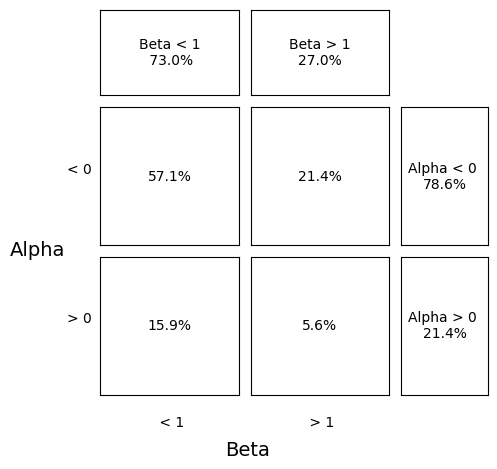

In [22]:
plt = show_pct_distribution(df_2022)
plt.show()

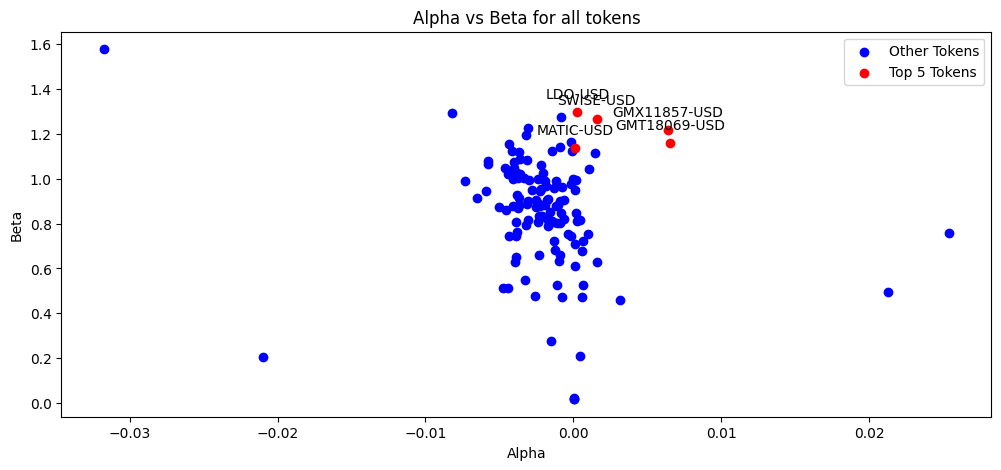

In [23]:
plt = show_alpha_vs_beta(high_beta_positive_alpha, df_2022)
plt.show()

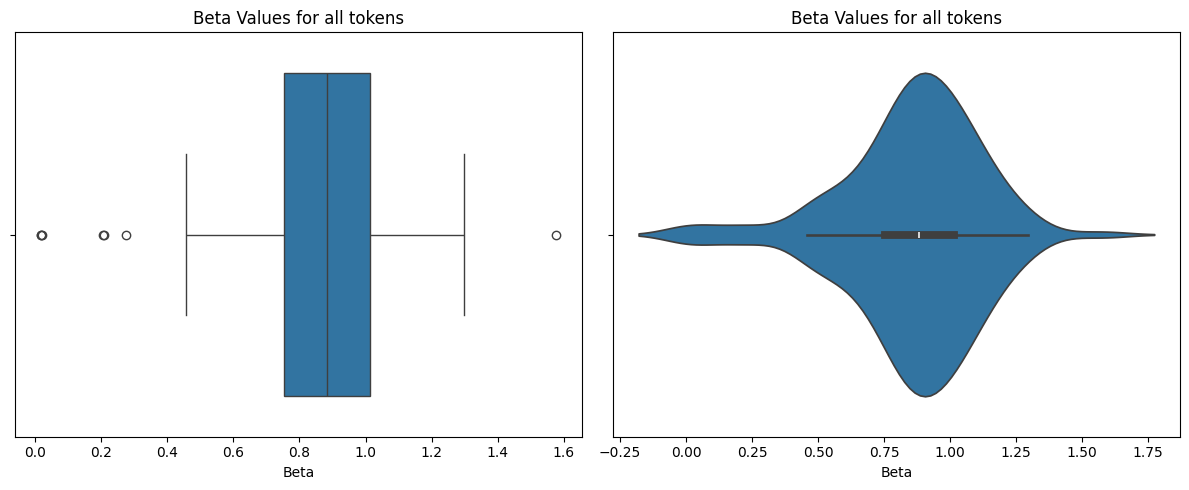

In [24]:
plt = show_beta_distribution_box_plot(df_2022)
plt.show()

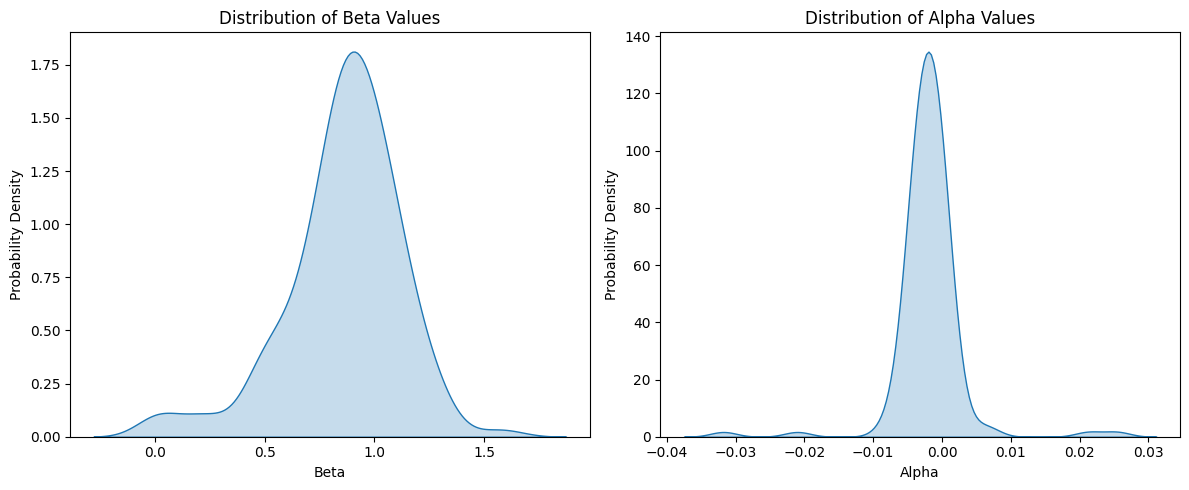

In [25]:
plt = show_kde(df_2022)
plt.show()

# EDA of Beta to ETH - no rolling (2023)

In [26]:
# Fetch data from 01.01.2023 to 01.01.2024 (1 full year)
alpha_2023 = create_alpha(period_start=2023, period_end=2024, use_rolling=False)

15-08-2024 15:24:05 - ONDO-USD: Data doesn't exist for startDate = 1672531200, endDate = 1704067200
15-08-2024 15:24:07 - JUP29210-USD: Data doesn't exist for startDate = 1672531200, endDate = 1704067200
15-08-2024 15:24:07 - BRETT29743-USD: Data doesn't exist for startDate = 1672531200, endDate = 1704067200
15-08-2024 15:24:10 - STRK22691-USD: Data doesn't exist for startDate = 1672531200, endDate = 1704067200
15-08-2024 15:24:14 - W-USD: Data doesn't exist for startDate = 1672531200, endDate = 1704067200
15-08-2024 15:24:18 - AEVO-USD: Data doesn't exist for startDate = 1672531200, endDate = 1704067200
15-08-2024 15:24:22 - MANTA-USD: Data doesn't exist for startDate = 1672531200, endDate = 1704067200
15-08-2024 15:24:25 - ENA-USD: Data doesn't exist for startDate = 1672531200, endDate = 1704067200
15-08-2024 15:24:25 - NOT-USD: Data doesn't exist for startDate = 1672531200, endDate = 1704067200


In [27]:
df_2023 = alpha_2023.get_df()

In [28]:
df_2023

,Beta,Alpha
BTC-USD,0.776112,1.178169e-03
ETH-USD,1.000000,8.416889e-19
LTC-USD,0.973589,-1.513950e-03
XMR-USD,0.468201,-5.616673e-04
XRP-USD,0.893085,1.137293e-04
...,...,...
SHIB-USD,0.800954,-8.216556e-04
BONK-USD,0.854556,5.498348e-03
FLOKI-USD,1.547196,1.275449e-03
BTT-USD,0.000000,0.000000e+00


In [29]:
high_beta = df_2023[df_2023['Beta'] > 1]
high_beta_pct = (len(high_beta) / len(df_2023)) * 100

low_beta = df_2023[df_2023['Beta'] < 1]
low_beta_pct = (len(low_beta) / len(df_2023)) * 100

high_beta_positive_alpha = df_2023[(df_2023['Beta'] > 1) & (df_2023['Alpha'] >= 0)]
high_beta_positive_alpha_pct = (len(high_beta_positive_alpha) / len(df_2023)) * 100

high_beta_negative_alpha = df_2023[(df_2023['Beta'] > 1) & (df_2023['Alpha'] < 0)]
high_beta_negative_alpha_pct = (len(high_beta_negative_alpha) / len(df_2023)) * 100

In [30]:
print(f"There are {len(high_beta)} (about {high_beta_pct:.1f}%) tokens which betas are above 1")
high_beta.sort_values(by='Beta', ascending=False)

There are 61 (about 43.6%) tokens which betas are above 1


,Beta,Alpha
POPCAT28782-USD,4.400948,-0.031881
JTO-USD,2.620653,0.003278
ORDI-USD,2.335512,0.004829
CFX-USD,1.728710,0.002906
BLUR-USD,1.657542,-0.002051
...,...,...
IOTX-USD,1.034377,0.000467
ENS-USD,1.030474,-0.002078
LINK-USD,1.027344,0.000872
ENJ-USD,1.026015,-0.000553


In [31]:
print(f"There are {len(low_beta)} (about {low_beta_pct:.1f}%) tokens which betas are below 1")
low_beta.sort_values(by='Beta', ascending=False)

There are 79 (about 56.4%) tokens which betas are below 1


,Beta,Alpha
ETH-USD,1.000000,8.416889e-19
SUI20947-USD,0.999712,-3.462306e-03
ICP-USD,0.998077,1.485444e-03
CHZ-USD,0.994388,-2.195134e-03
AVAX-USD,0.986945,1.774849e-03
...,...,...
LEO-USD,0.058087,2.053457e-04
PAXG-USD,0.051591,1.983611e-04
FRAX-USD,0.035223,-6.355485e-05
BTT-USD,0.000000,0.000000e+00


In [32]:
print(f"There are {len(high_beta_positive_alpha)} (about {high_beta_positive_alpha_pct:.1f}%) tokens which betas are above 1 and which alphas are positive")
high_beta_positive_alpha.sort_values(by='Beta', ascending=False)

There are 33 (about 23.6%) tokens which betas are above 1 and which alphas are positive


,Beta,Alpha
JTO-USD,2.620653,0.003278
ORDI-USD,2.335512,0.004829
CFX-USD,1.728710,0.002906
PENDLE-USD,1.585272,0.006150
FLOKI-USD,1.547196,0.001275
OP-USD,1.507573,0.001213
PYTH-USD,1.493973,0.000622
LDO-USD,1.493239,0.000095
WIF-USD,1.486794,0.018050
DYDX-USD,1.364892,0.001141


In [33]:
print(f"There are {len(high_beta_negative_alpha)} (about {high_beta_negative_alpha_pct:.1f}%) tokens which betas are above 1 and which alphas are negative")
high_beta_negative_alpha.sort_values(by='Beta', ascending=False)

There are 28 (about 20.0%) tokens which betas are above 1 and which alphas are negative


,Beta,Alpha
POPCAT28782-USD,4.400948,-0.031881
BLUR-USD,1.657542,-0.002051
ARB11841-USD,1.357917,-0.000912
SWISE-USD,1.341293,-0.002512
GMT18069-USD,1.308704,-0.001501
GALA-USD,1.299898,-0.000668
FIL-USD,1.289734,-0.000082
GMX11857-USD,1.251002,-0.001447
RPL-USD,1.225126,-0.001042
AR-USD,1.216434,-0.000914


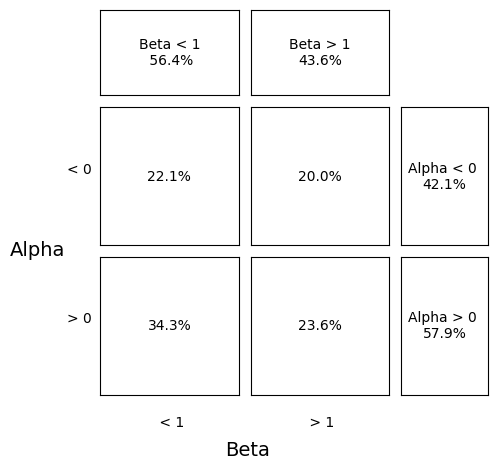

In [34]:
plt = show_pct_distribution(df_2023)
plt.show()

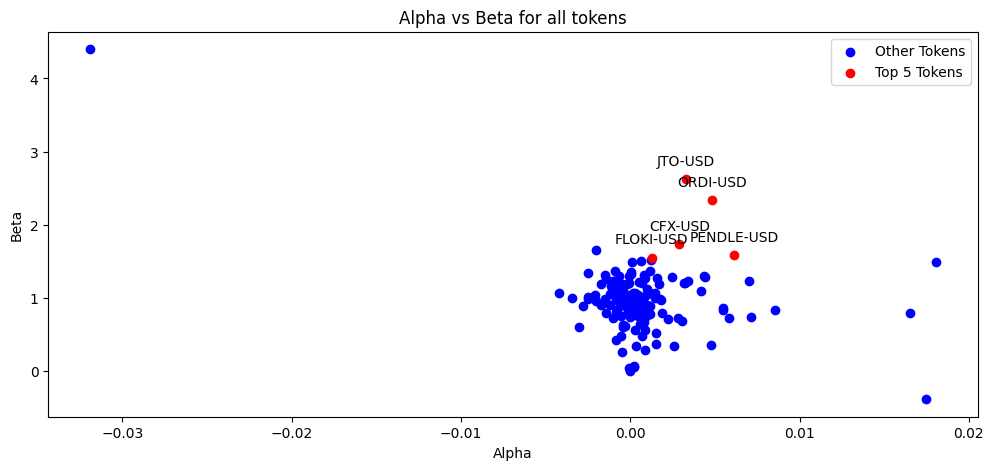

In [35]:
plt = show_alpha_vs_beta(high_beta_positive_alpha, df_2023)
plt.show()

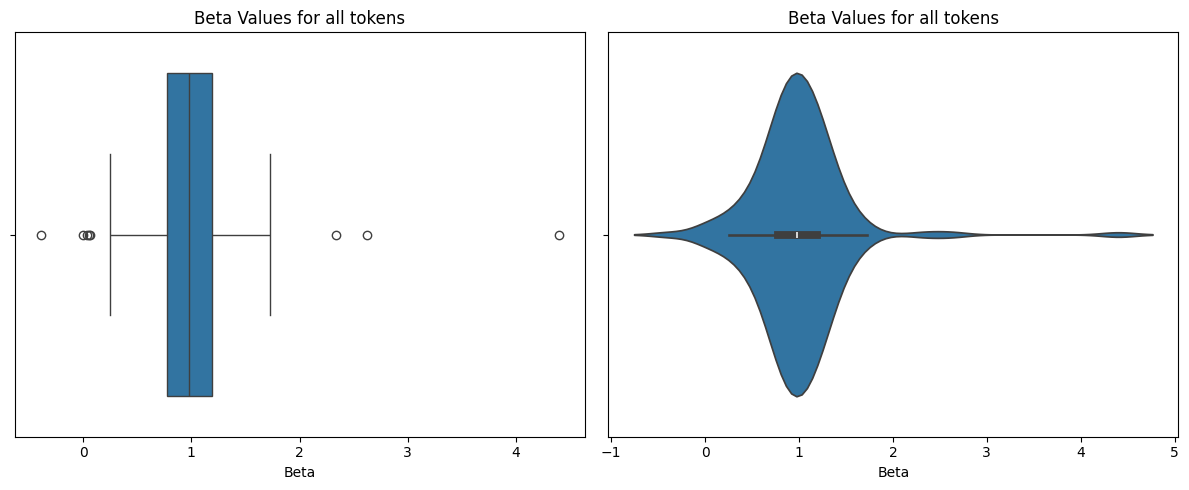

In [36]:
plt = show_beta_distribution_box_plot(df_2023)
plt.show()

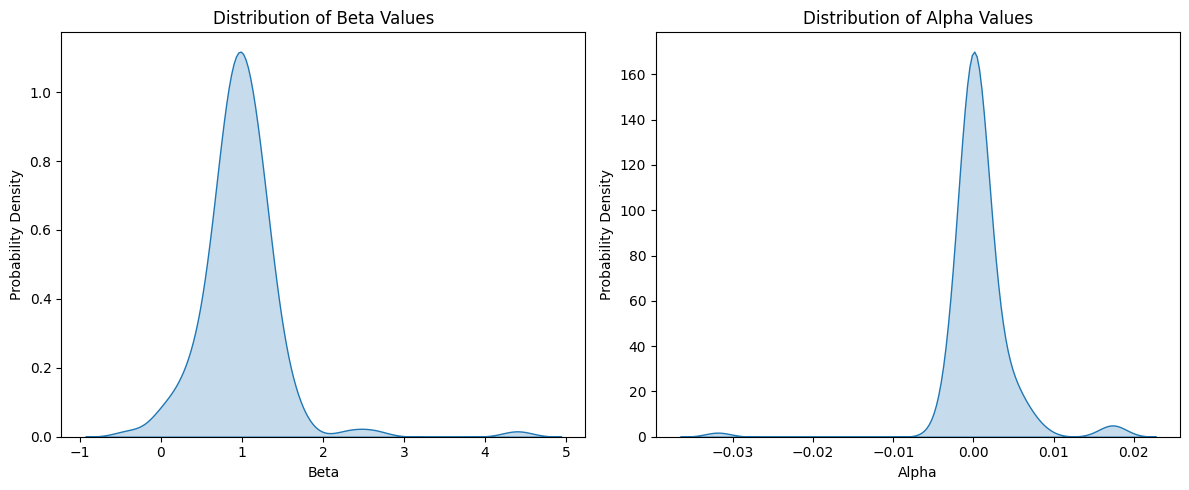

In [37]:
plt = show_kde(df_2023)
plt.show()

# EDA of Beta to ETH - no rolling (2024)

In [38]:
# Fetch data from 01.01.2024 to 01.01.2025 (1 full year)
alpha_2024 = create_alpha(period_start=2024, period_end=2025, use_rolling=False)

In [39]:
df_2024 = alpha_2024.get_df()

In [40]:
df_2024

,Beta,Alpha
BTC-USD,0.697187,9.794946e-04
ETH-USD,1.000000,2.168404e-19
LTC-USD,0.690137,-1.043104e-03
XMR-USD,0.373650,-7.764341e-04
XRP-USD,0.565377,-7.716149e-04
...,...,...
FLOKI-USD,1.461247,4.250064e-03
BTT-USD,0.835421,-1.746531e-03
MOG-USD,1.137557,2.567465e-04
ENA-USD,1.306898,-1.024613e-03


In [41]:
high_beta = df_2024[df_2024['Beta'] > 1]
high_beta_pct = (len(high_beta) / len(df_2024)) * 100

low_beta = df_2024[df_2024['Beta'] < 1]
low_beta_pct = (len(low_beta) / len(df_2024)) * 100

high_beta_positive_alpha = df_2024[(df_2024['Beta'] > 1) & (df_2024['Alpha'] > 0)]
high_beta_positive_alpha_pct = (len(high_beta_positive_alpha) / len(df_2024)) * 100

high_beta_negative_alpha = df_2024[(df_2024['Beta'] > 1) & (df_2024['Alpha'] < 0)]
high_beta_negative_alpha_pct = (len(high_beta_negative_alpha) / len(df_2024)) * 100

In [42]:
print(f"There are {len(high_beta)} (about {high_beta_pct:.1f}%) tokens which betas are above 1")
high_beta.sort_values(by='Beta', ascending=False)

There are 65 (about 43.3%) tokens which betas are above 1


,Beta,Alpha
POPCAT28782-USD,2.667431,0.015955
WIF-USD,1.890929,0.007925
BONK-USD,1.474802,-0.000287
FLOKI-USD,1.461247,0.004250
BRETT29743-USD,1.433246,0.008240
...,...,...
ROSE-USD,1.015916,-0.004385
AVAX-USD,1.014099,-0.003697
JTO-USD,1.007711,0.000201
ZIL-USD,1.005795,-0.003290


In [43]:
print(f"There are {len(low_beta)} (about {low_beta_pct:.1f}%) tokens which betas are below 1")
low_beta.sort_values(by='Beta', ascending=False)

There are 85 (about 56.7%) tokens which betas are below 1


,Beta,Alpha
ETH-USD,1.000000,2.168404e-19
MINA-USD,0.999669,-6.289895e-03
GNO-USD,0.996954,-1.145543e-03
AXS-USD,0.988930,-3.543554e-03
SAND-USD,0.983541,-4.343177e-03
...,...,...
WBT-USD,0.178890,2.715628e-03
BDX-USD,0.104879,9.069958e-04
PAXG-USD,0.049702,7.865275e-04
LEO-USD,0.031772,1.682939e-03


In [44]:
print(f"There are {len(high_beta_positive_alpha)} (about {high_beta_positive_alpha_pct:.1f}%) tokens which betas are above 1 and which alphas are positive")
high_beta_positive_alpha.sort_values(by='Beta', ascending=False)

There are 19 (about 12.7%) tokens which betas are above 1 and which alphas are positive


,Beta,Alpha
POPCAT28782-USD,2.667431,0.015955
WIF-USD,1.890929,0.007925
FLOKI-USD,1.461247,0.004250
BRETT29743-USD,1.433246,0.008240
ENS-USD,1.421334,0.002011
CKB-USD,1.368195,0.002206
ARKM-USD,1.311820,0.001882
PENDLE-USD,1.250371,0.002801
FET-USD,1.212430,0.000118
AR-USD,1.148124,0.002597


In [45]:
print(f"There are {len(high_beta_negative_alpha)} (about {high_beta_negative_alpha_pct:.1f}%) tokens which betas are above 1 and which alphas are negative")
high_beta_negative_alpha.sort_values(by='Beta', ascending=False)

There are 46 (about 30.7%) tokens which betas are above 1 and which alphas are negative


,Beta,Alpha
BONK-USD,1.474802,-0.000287
ENA-USD,1.306898,-0.001025
ORDI-USD,1.295477,-0.004776
WLD-USD,1.235327,-0.004322
BEAM28298-USD,1.210911,-0.002111
THETA-USD,1.206935,-0.000974
RUNE-USD,1.194826,-0.002026
LDO-USD,1.172464,-0.005138
WOO-USD,1.165583,-0.005436
CFX-USD,1.161771,-0.001631


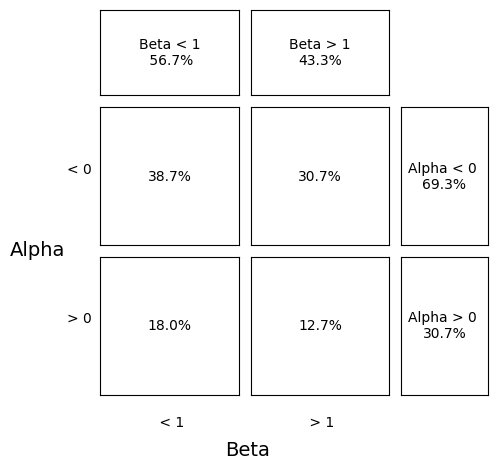

In [46]:
plt = show_pct_distribution(df_2024)

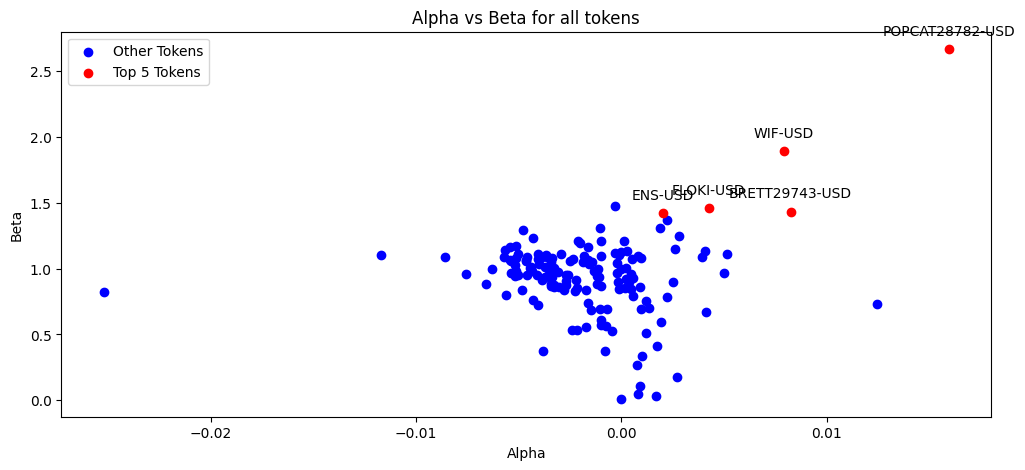

In [47]:
plt = show_alpha_vs_beta(high_beta_positive_alpha, df_2024)
plt.show()

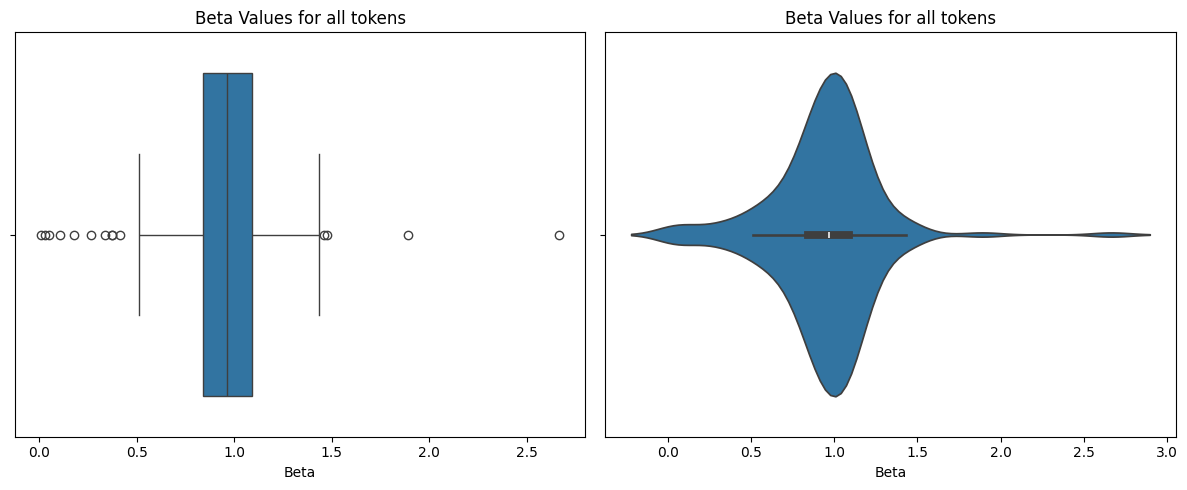

In [48]:
plt = show_beta_distribution_box_plot(df_2024)
plt.show()

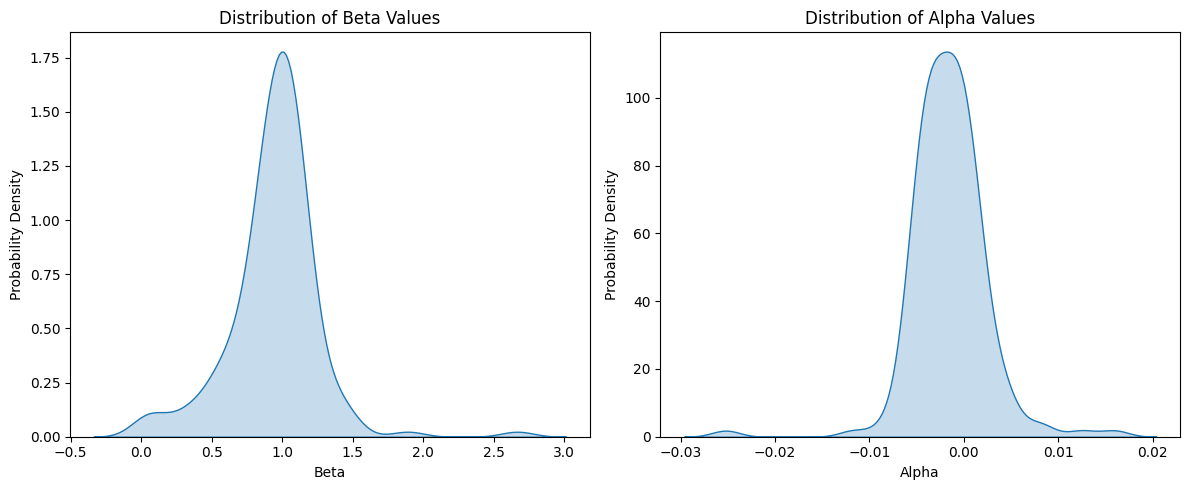

In [49]:
plt = show_kde(df_2024)
plt.show()

# EDA of Beta for ETH using data from 2021, 2022, 2023, 2024.

In [50]:
dfs = [df_2021, df_2022, df_2023, df_2024]
labels=["Full Period - 2021", "Full Period - 2022", "Full Period - 2023", "Full Period - 2024"]

combined_df = pd.concat(dfs, keys=labels).reset_index(level=1, drop=True).reset_index()
combined_df.rename(columns={"index": "Dataset"}, inplace=True)

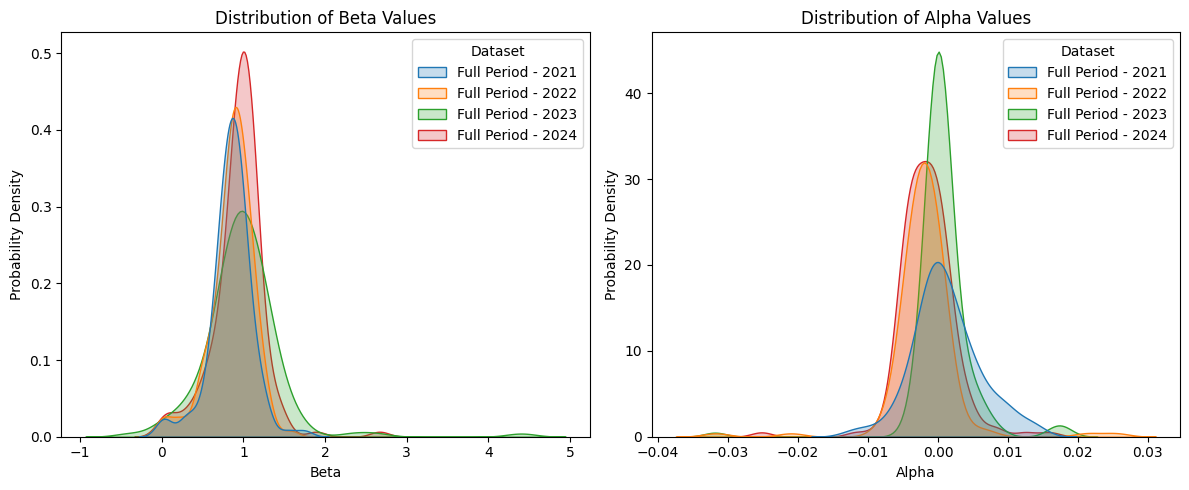

In [51]:
plt = show_kde(combined_df, hue='Dataset')
plt.show()

In [52]:
for index, df in enumerate(dfs):
    print(f"Mean value for Beta `{labels[index]}` is {df['Beta'].mean()}")
    print(f"Median value for Beta `{labels[index]}` is {df['Beta'].median()}")
    print(f"Variance value for Beta `{labels[index]}` is {df['Beta'].var()}")
    print("=======================================================")

Mean value for Beta `Full Period - 2021` is 0.8463807789133192
Median value for Beta `Full Period - 2021` is 0.8541938896289999
Variance value for Beta `Full Period - 2021` is 0.06539017744097117
Mean value for Beta `Full Period - 2022` is 0.859504770106007
Median value for Beta `Full Period - 2022` is 0.8837130498821231
Variance value for Beta `Full Period - 2022` is 0.06704796221402713
Mean value for Beta `Full Period - 2023` is 0.9818672759544613
Median value for Beta `Full Period - 2023` is 0.9764326465426024
Variance value for Beta `Full Period - 2023` is 0.2379891675693939
Mean value for Beta `Full Period - 2024` is 0.9397786128656743
Median value for Beta `Full Period - 2024` is 0.9652565631364978
Variance value for Beta `Full Period - 2024` is 0.09862259505141986


In [53]:
for index, df in enumerate(dfs):
    print(f"Mean value for Alpha `{labels[index]}` is {df['Alpha'].mean()}")
    print(f"Median value for Alpha `{labels[index]}` is {df['Alpha'].median()}")
    print(f"Variance value for Alpha `{labels[index]}` is {df['Alpha'].var()}")
    print("=======================================================")

Mean value for Alpha `Full Period - 2021` is 0.0011406984958200847
Median value for Alpha `Full Period - 2021` is 0.0003885966742510925
Variance value for Alpha `Full Period - 2021` is 2.3391879627379325e-05
Mean value for Alpha `Full Period - 2022` is -0.0019105115676110696
Median value for Alpha `Full Period - 2022` is -0.0019234930018432528
Variance value for Alpha `Full Period - 2022` is 2.5373168490558923e-05
Mean value for Alpha `Full Period - 2023` is 0.0006944128410985843
Median value for Alpha `Full Period - 2023` is 0.0001889627719775034
Variance value for Alpha `Full Period - 2023` is 1.805358940212903e-05
Mean value for Alpha `Full Period - 2024` is -0.001575796892315228
Median value for Alpha `Full Period - 2024` is -0.0016244065614652863
Variance value for Alpha `Full Period - 2024` is 1.6177882735267177e-05


# EDA of Beta to ETH - with 60 day rolling (2023 & 2024)

In [2]:
alpha = create_alpha(use_rolling=True, window=60)

In [3]:
beta_data = {}
alpha_data = {}

for inst in alpha.insts:
    beta_data[inst] = alpha.dfs[inst]["beta_eth"]
    alpha_data[inst] = alpha.dfs[inst]["alpha_eth"]

beta_df = pd.concat(beta_data, axis=1)
beta_df.index = pd.to_datetime(beta_df.index)

alpha_df = pd.concat(alpha_data, axis=1)
alpha_df.index = pd.to_datetime(alpha_df.index)

In [4]:
# Display the last few rows of the beta eth data
beta_df.tail()

,BTC-USD,ETH-USD,LTC-USD,XMR-USD,XRP-USD,ADA-USD,DOGE-USD,SOL-USD,DOT-USD,ATOM-USD,...,GLM-USD,HOT-USD,SHIB-USD,NOT-USD,BONK-USD,FLOKI-USD,BTT-USD,MOG-USD,ENA-USD,BDX-USD
datetime,,,,,,,,,,,,,,,,,,,,,
2024-08-11 00:00:00+00:00,0.716287,1.0,0.834985,0.381266,0.416980,0.835883,0.973280,1.016353,0.771657,0.687319,...,0.916400,0.950496,0.738648,1.418318,1.306318,1.344448,0.000000,3.541625,1.548996,-0.192171
2024-08-12 00:00:00+00:00,0.683134,1.0,0.821488,0.359373,0.407998,0.812375,0.976470,0.977663,0.738410,0.675483,...,0.864596,0.939157,0.758882,1.369430,1.257149,1.315748,0.000000,3.347558,1.566716,-0.139876
2024-08-13 00:00:00+00:00,0.683348,1.0,0.821875,0.360809,0.408552,0.814238,0.980936,0.980726,0.741287,0.679570,...,0.867201,0.940064,0.762821,1.356886,1.264518,1.317869,0.000000,3.349243,1.562587,-0.152079
2024-08-14 00:00:00+00:00,0.691812,1.0,0.818647,0.345188,0.403041,0.819960,0.988236,0.986317,0.746705,0.687439,...,0.865476,0.946287,0.748934,1.338001,1.280938,1.328061,0.000000,3.379138,1.558477,-0.090207
2024-08-15 00:00:00+00:00,0.693178,1.0,0.823018,0.346534,0.406757,0.821672,0.991487,0.981458,0.742312,0.686598,...,0.868078,0.945479,0.751045,1.354624,1.276126,1.326424,-0.000793,3.397268,1.556668,-0.073996


In [5]:
# Display the last few rows of the beta eth data
alpha_df.tail()

,BTC-USD,ETH-USD,LTC-USD,XMR-USD,XRP-USD,ADA-USD,DOGE-USD,SOL-USD,DOT-USD,ATOM-USD,...,GLM-USD,HOT-USD,SHIB-USD,NOT-USD,BONK-USD,FLOKI-USD,BTT-USD,MOG-USD,ENA-USD,BDX-USD
datetime,,,,,,,,,,,,,,,,,,,,,
2024-08-11 00:00:00+00:00,0.001462,-6.580820e-20,0.000070,-0.001108,0.004271,-0.000167,-0.000845,0.004094,-0.002477,-0.003881,...,-0.001082,-0.001905,-0.004678,-0.000788,0.000187,-0.003003,0.000000,0.019614,-0.006585,0.003592
2024-08-12 00:00:00+00:00,0.000793,1.910078e-19,-0.000904,-0.000758,0.004576,-0.000347,-0.000554,0.003841,-0.002472,-0.003651,...,-0.001216,-0.001968,-0.003701,-0.001441,0.000691,-0.003160,0.000000,0.013484,-0.006152,0.004212
2024-08-13 00:00:00+00:00,0.001453,-5.403967e-19,0.000106,-0.000891,0.004970,0.000246,0.000166,0.004543,-0.001939,-0.002990,...,-0.000851,-0.001477,-0.002734,-0.003668,0.002283,-0.002639,0.000000,0.014095,-0.005706,0.001453
2024-08-14 00:00:00+00:00,0.001374,-6.898266e-19,0.000436,-0.000972,0.004434,0.000495,0.000034,0.004627,-0.002191,-0.003370,...,-0.001305,-0.001171,-0.003114,-0.003452,0.002338,-0.002358,0.000000,0.016439,-0.006292,0.005166
2024-08-15 00:00:00+00:00,0.001578,1.408734e-20,0.001193,-0.000956,0.004676,0.000690,0.000480,0.004274,-0.002105,-0.003563,...,-0.000913,-0.001288,-0.003248,-0.002436,0.002383,-0.002253,-0.004963,0.020938,-0.005978,0.006462


In [6]:
beta_last_values = beta_df.iloc[-1]
alpha_last_values = alpha_df.iloc[-1]

data = {
    token: {'Beta': beta_last_values[token], 'Alpha': alpha_last_values[token]} 
    for token in beta_last_values.index
}

df = pd.DataFrame.from_dict(data, orient='index')
df = df.dropna()

In [7]:
df

,Beta,Alpha
BTC-USD,0.693178,1.578469e-03
ETH-USD,1.000000,1.408734e-20
LTC-USD,0.823018,1.193453e-03
XMR-USD,0.346534,-9.558690e-04
XRP-USD,0.406757,4.675774e-03
...,...,...
FLOKI-USD,1.326424,-2.252934e-03
BTT-USD,-0.000793,-4.962938e-03
MOG-USD,3.397268,2.093762e-02
ENA-USD,1.556668,-5.977673e-03


In [8]:
high_beta = df[df['Beta'] > 1]
high_beta_pct = (len(high_beta) / len(df)) * 100

low_beta = df[df['Beta'] < 1]
low_beta_pct = (len(low_beta) / len(df)) * 100

high_beta_positive_alpha = df[(df['Beta'] > 1) & (df['Alpha'] > 0)]
high_beta_positive_alpha_pct = (len(high_beta_positive_alpha) / len(df)) * 100

high_beta_negative_alpha = df[(df['Beta'] > 1) & (df['Alpha'] < 0)]
high_beta_negative_alpha_pct = (len(high_beta_negative_alpha) / len(df)) * 100

In [9]:
print(f"There are {len(high_beta)} (about {high_beta_pct:.1f}%) tokens which betas are above 1")
high_beta.sort_values(by='Beta', ascending=False)

There are 71 (about 47.7%) tokens which betas are above 1


,Beta,Alpha
MOG-USD,3.397268,2.093762e-02
POPCAT28782-USD,1.828108,1.873319e-02
ENS-USD,1.630007,4.301891e-03
BRETT29743-USD,1.574301,-1.663838e-03
ENA-USD,1.556668,-5.977673e-03
...,...,...
APT21794-USD,1.006291,1.980956e-03
UNI7083-USD,1.005734,-5.399777e-03
AVAX-USD,1.003528,-7.648578e-04
ARKM-USD,1.002212,-4.818586e-03


In [10]:
print(f"There are {len(low_beta)} (about {low_beta_pct:.1f}%) tokens which betas are below 1")
low_beta.sort_values(by='Beta', ascending=False)

There are 78 (about 52.3%) tokens which betas are below 1


,Beta,Alpha
APE18876-USD,0.999408,-0.004706
DOGE-USD,0.991487,0.000480
AXS-USD,0.989378,-0.000464
SOL-USD,0.981458,0.004274
FXS-USD,0.980639,-0.007033
...,...,...
PAXG-USD,0.082856,0.001251
LEO-USD,0.007489,-0.000060
FRAX-USD,0.001707,-0.000016
BTT-USD,-0.000793,-0.004963


In [11]:
print(f"There are {len(high_beta_positive_alpha)} (about {high_beta_positive_alpha_pct:.1f}%) tokens which betas are above 1 and which alphas are positive")
high_beta_positive_alpha.sort_values(by='Beta', ascending=False)

There are 29 (about 19.5%) tokens which betas are above 1 and which alphas are positive


,Beta,Alpha
MOG-USD,3.397268,2.093762e-02
POPCAT28782-USD,1.828108,1.873319e-02
ENS-USD,1.630007,4.301891e-03
SUI20947-USD,1.500612,6.997062e-03
SEI-USD,1.399873,9.157324e-04
RAY-USD,1.396626,7.486653e-03
MPL-USD,1.360528,8.800175e-03
AIOZ-USD,1.345707,1.405636e-03
CFX-USD,1.324819,1.401873e-03
JTO-USD,1.304338,3.903234e-03


In [12]:
print(f"There are {len(high_beta_negative_alpha)} (about {high_beta_negative_alpha_pct:.1f}%) tokens which betas are above 1 and which alphas are negative")
high_beta_negative_alpha.sort_values(by='Beta', ascending=False)

There are 42 (about 28.2%) tokens which betas are above 1 and which alphas are negative


,Beta,Alpha
BRETT29743-USD,1.574301,-0.001664
ENA-USD,1.556668,-0.005978
AEVO-USD,1.440874,-0.001811
RBN-USD,1.431579,-0.002012
WIF-USD,1.429361,-0.000993
W-USD,1.416308,-0.004262
ORDI-USD,1.392539,-0.000441
NOT-USD,1.354624,-0.002436
CKB-USD,1.342137,-0.001053
FLOKI-USD,1.326424,-0.002253


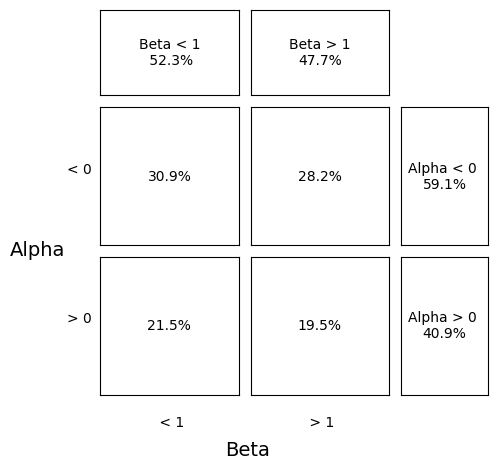

In [13]:
plt = show_pct_distribution(df)
plt.show()

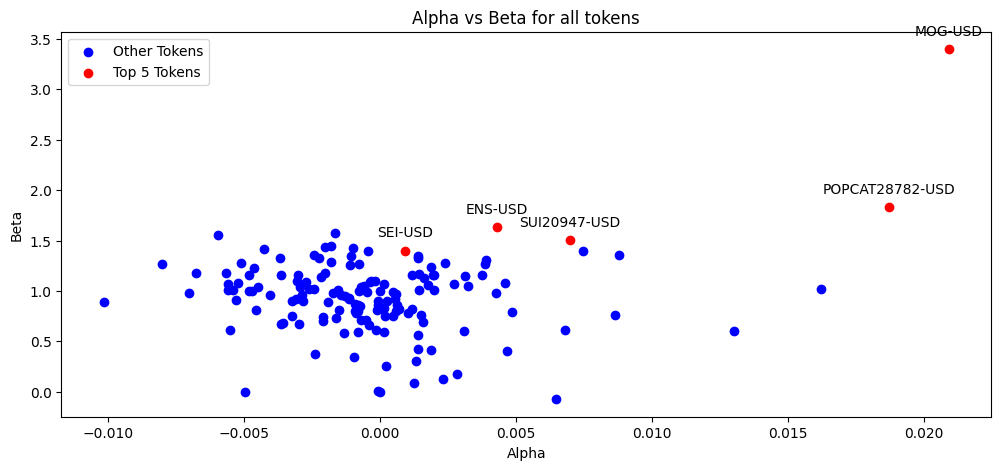

In [14]:
plt = show_alpha_vs_beta(high_beta_positive_alpha, df)
plt.show()

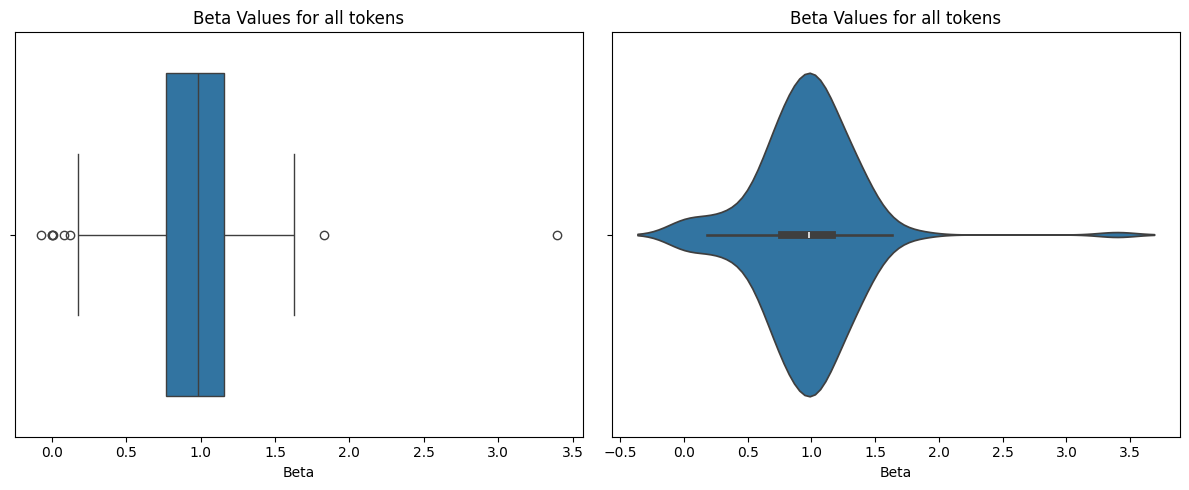

In [15]:
plt = show_beta_distribution_box_plot(df)
plt.show()

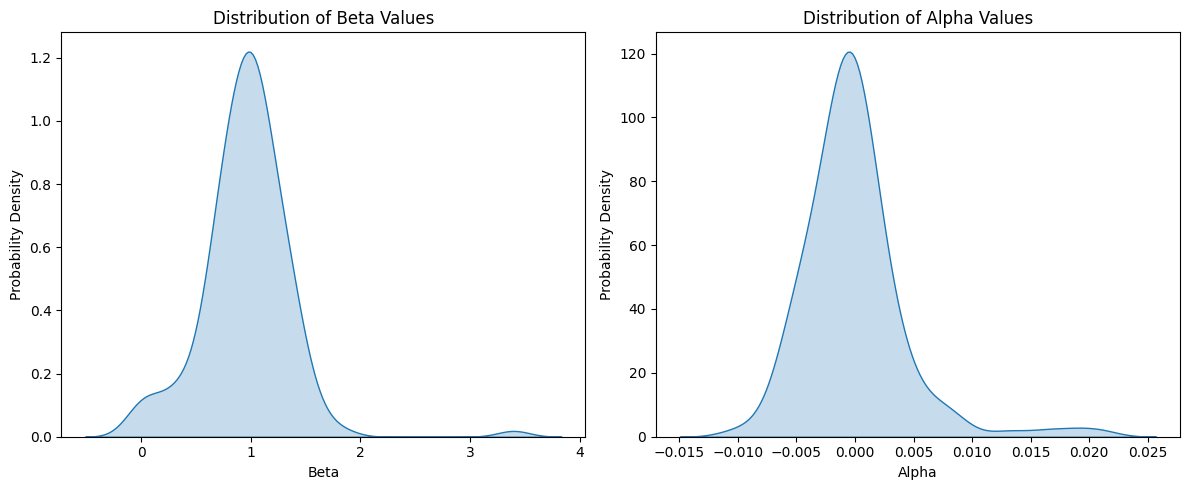

In [16]:
plt = show_kde(df)
plt.show()

In [17]:
top_5_tokens = high_beta_positive_alpha.nlargest(5, "Beta").index.tolist()

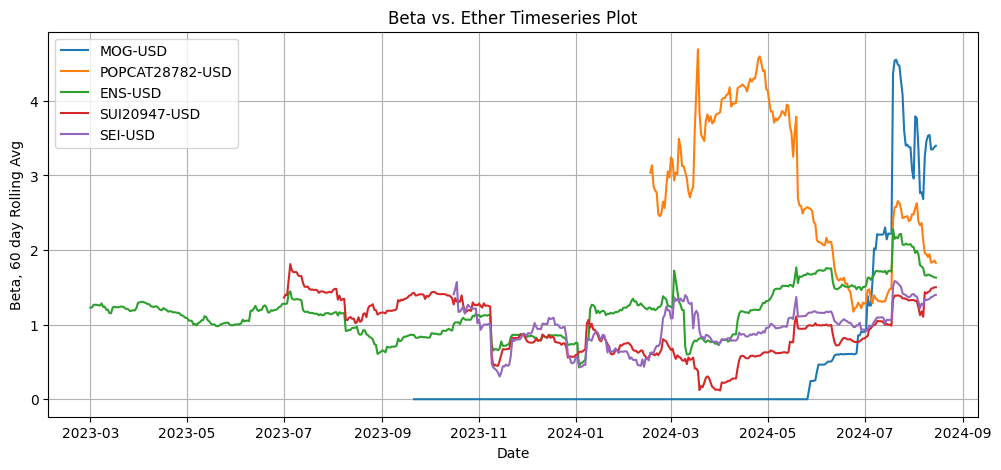

In [18]:
plt = show_timeseries_plot(beta_df, top_5_tokens, 'Beta')

In [19]:
top_5_tokens = high_beta_positive_alpha.nlargest(5, "Alpha").index.tolist()

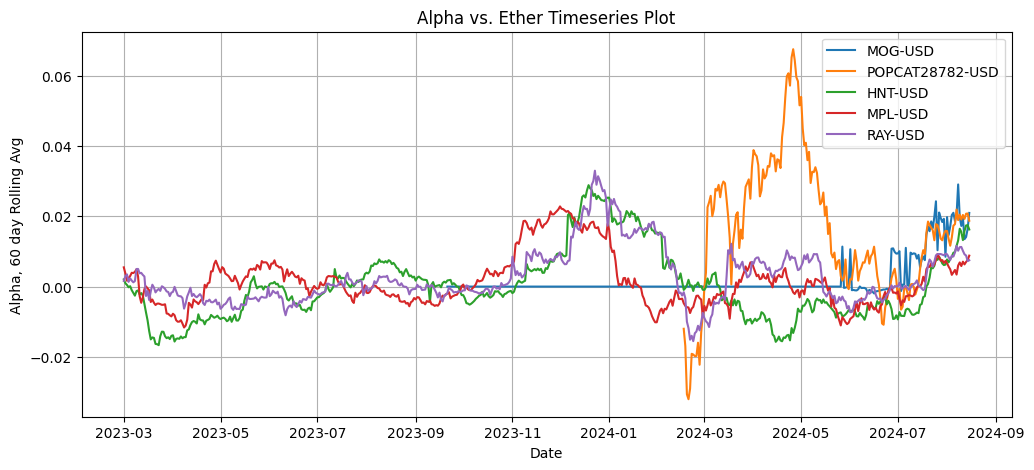

In [20]:
plt = show_timeseries_plot(alpha_df, top_5_tokens, 'Alpha')

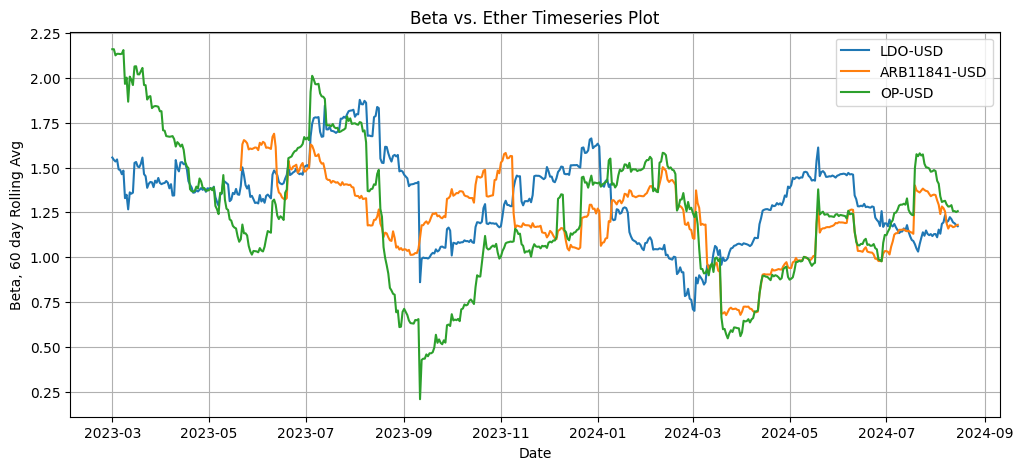

In [21]:
plt = show_timeseries_plot(beta_df, ['LDO-USD', 'ARB11841-USD', 'OP-USD'], 'Beta')

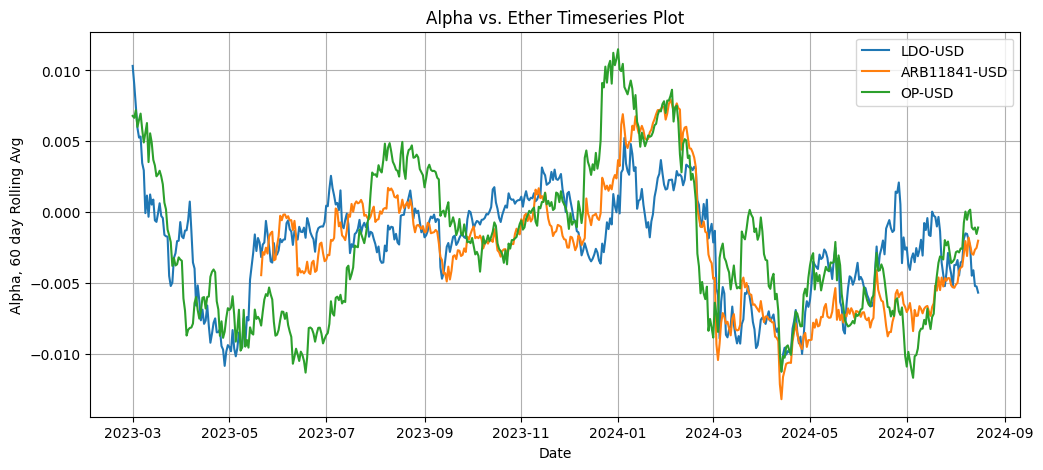

In [22]:
plt = show_timeseries_plot(alpha_df, ['LDO-USD', 'ARB11841-USD', 'OP-USD'], 'Alpha')